In [ ]:
import numpy as np
import pandas as pd
import math
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN, k_means, KMeans
from sklearn.preprocessing import StandardScaler, normalize


## 8.1 K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [ ]:
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

,user,Jaws,Star Wars,Exorcist,Omen
0,john,5,5,2,1
1,mary,4,5,3,2
2,bob,4,4,4,3
3,lisa,2,2,4,5
4,lee,1,2,3,4
5,harry,2,1,5,5


In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [ ]:


data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data)
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

,Cluster ID
user,
john,0
mary,0
bob,0
lisa,1
lee,1
harry,1


The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [5]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,1235.687500,39.937500,18872.125000,65.750000,82.625000
1,1317.000000,28.000000,46595.000000,81.500000,89.750000
2,1400.000000,31.000000,102262.000000,98.000000,75.000000
3,1252.500000,52.500000,32244.500000,69.500000,81.500000
4,1265.444444,35.888889,26898.222222,79.888889,83.888889
5,1357.000000,30.000000,56766.000000,95.000000,86.000000
6,1254.000000,42.000000,38811.600000,74.600000,79.200000
7,1245.777778,42.222222,23397.111111,72.444444,82.444444
8,1370.000000,18.000000,61921.000000,92.000000,88.000000
9,1350.000000,19.000000,52468.000000,90.000000,93.000000


Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments.

In [ ]:

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


,user,Jaws,Star Wars,Exorcist,Omen,Cluster ID
0,paul,4,5,1,2,0
1,kim,3,2,4,4,1
2,liz,2,3,4,1,0
3,tom,3,2,3,3,1
4,bill,5,4,1,4,0


To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

Text(0, 0.5, 'SSE')

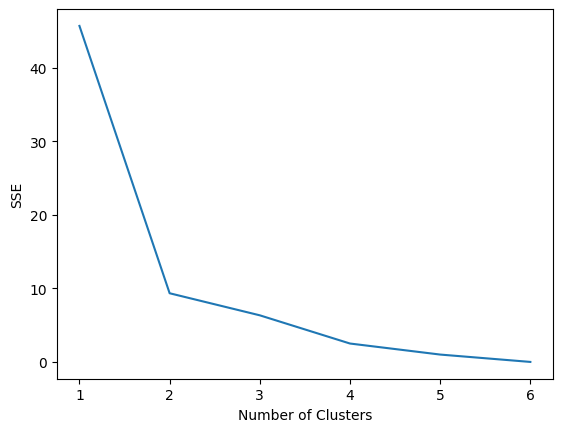

In [ ]:

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## 8.2 Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
data = pd.read_csv('http://pluto.hood.edu/~dong/datasets/vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


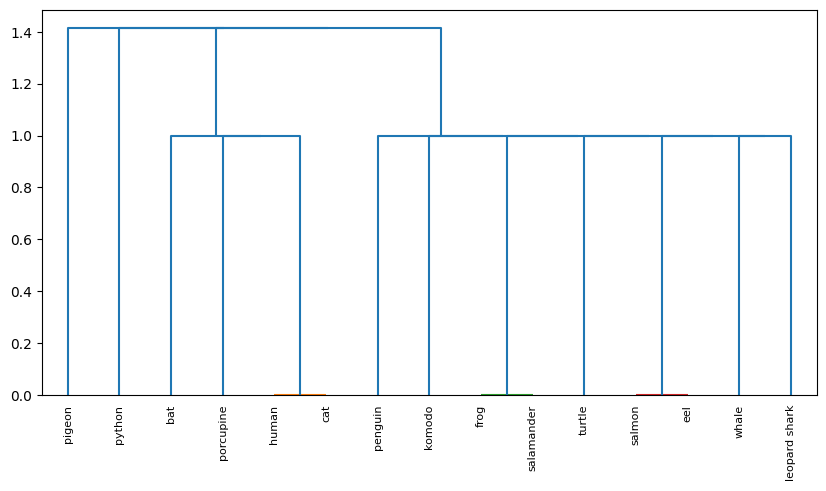

In [ ]:
names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X, 'single')
#dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

plt.figure(figsize=(10, 5))  # Adjust the width and height
dn = hierarchy.dendrogram(Z,labels=names.tolist(),  leaf_font_size=8)
plt.xticks(rotation=90)
plt.show()

### 8.2.2 Complete Link (MAX)

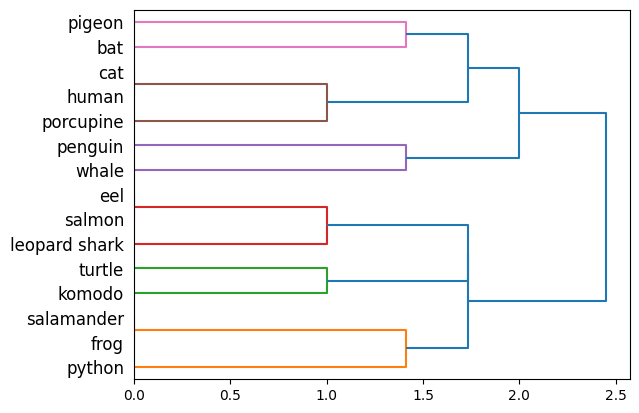

In [ ]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 8.3.3 Group Average

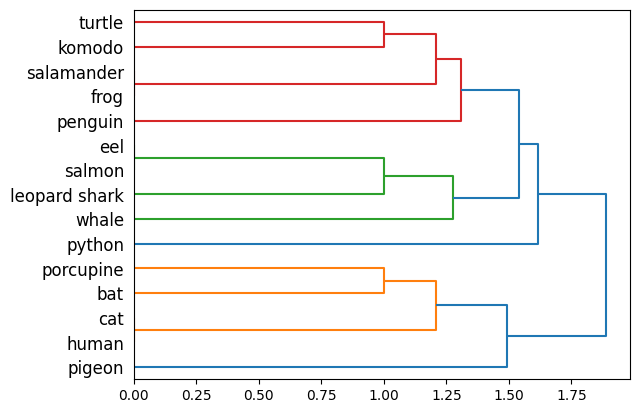

In [ ]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 8.3 Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples).

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

<Axes: xlabel='x', ylabel='y'>

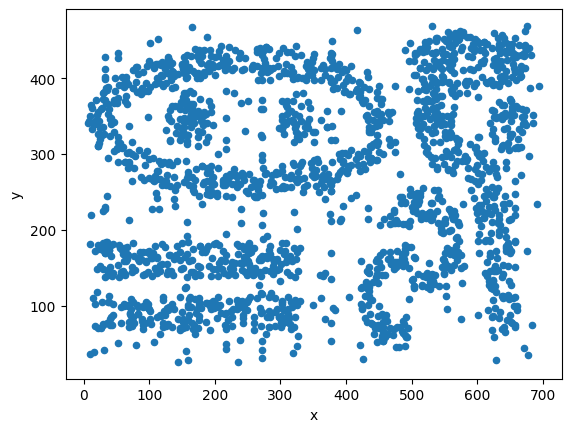

In [ ]:
data = pd.read_csv('http://pluto.hood.edu/~dong/datasets/chameleon.data', delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

In [ ]:
result['Cluster ID'].value_counts()

NameError: name 'result' is not defined

(1971, 2)


<Axes: xlabel='x', ylabel='y'>

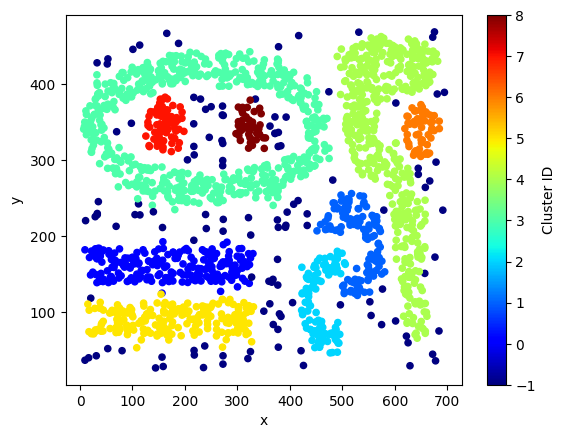

In [ ]:
print(data.shape)
db = DBSCAN(eps=15.5, min_samples=5).fit(data)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
#print(len(core_samples_mask[core_samples_mask == True]))

labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')


## 8.4 Spectral Clustering

One of the main limitations of the k-means clustering algorithm is its tendency to seek for globular-shaped clusters. Thus, it does not work when applied to datasets with arbitrary-shaped clusters or when the cluster centroids overlapped with one another. Spectral clustering can overcome this limitation by exploiting properties of the similarity graph to overcome such limitations. To illustrate this, consider the following two-dimensional datasets.

<Axes: xlabel='x', ylabel='y'>

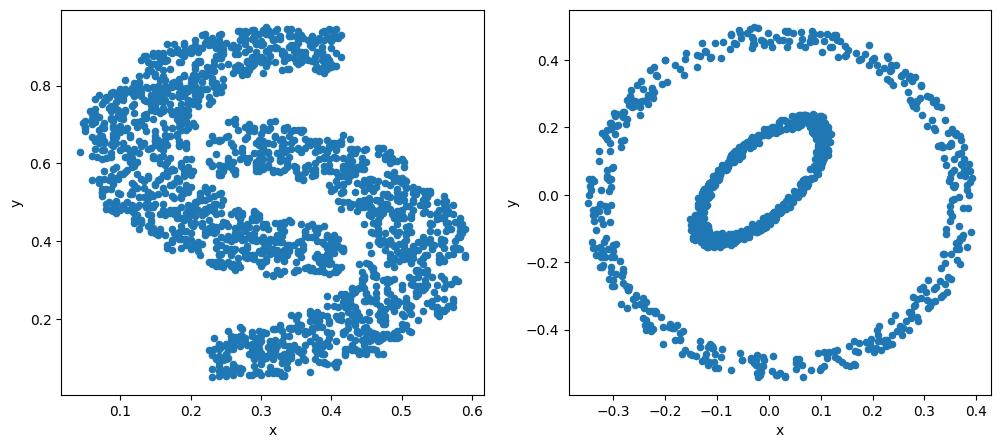

In [ ]:
import pandas as pd

data1 = pd.read_csv('http://pluto.hood.edu/~dong/datasets/2d_data.txt', delimiter=' ', names=['x','y'])
data2 = pd.read_csv('http://pluto.hood.edu/~dong/datasets/elliptical.txt', delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

Below, we demonstrate the results of applying k-means to the datasets (with k=2).

Text(0.5, 1.0, 'K-means Clustering')

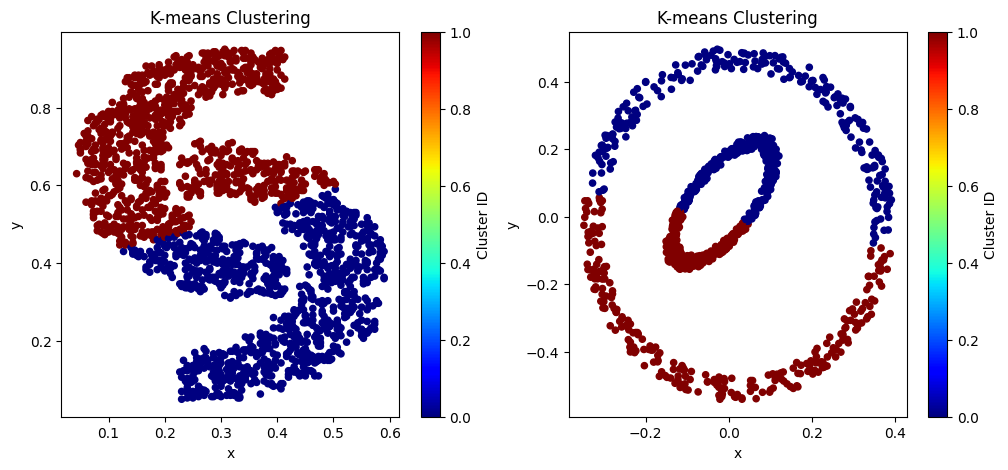

In [ ]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1, n_init = 'auto')
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1,  n_init = 'auto')
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

The plots above show the poor performance of k-means clustering. Next, we apply spectral clustering to the datasets. Spectral clustering converts the data into a similarity graph and applies the normalized cut graph partitioning algorithm to generate the clusters. In the example below, we use the Gaussian radial basis function as our affinity (similarity) measure. Users need to tune the kernel parameter (gamma) value in order to obtain the appropriate clusters for the given dataset.

Text(0.5, 1.0, 'Spectral Clustering')

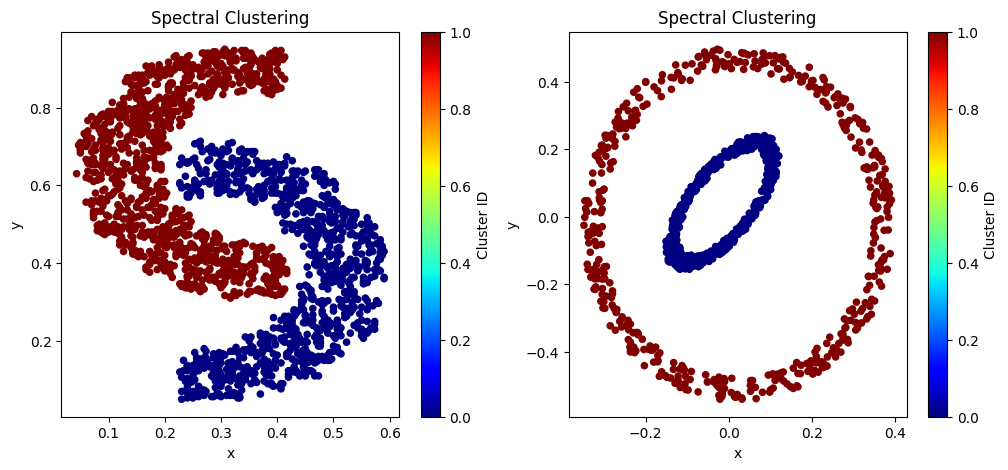

In [ ]:
from sklearn import cluster
import pandas as pd

spectral = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=5000)
spectral.fit(data1)
labels1 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

spectral2 = cluster.SpectralClustering(n_clusters=2,random_state=1,affinity='rbf',gamma=1000)
spectral2.fit(data2)
labels2 = pd.DataFrame(spectral2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('Spectral Clustering')

## 8.5 Summary

This tutorial illustrates examples of using different Python's implementation of clustering algorithms. Algorithms such as k-means, spectral clustering, and DBScan are designed to create disjoint partitions of the data whereas the single-link, complete-link, and group average algorithms are designed to generate a hierarchy of cluster partitions.

References:
[1] George Karypis, Eui-Hong Han, and Vipin Kumar. CHAMELEON: A Hierarchical Clustering Algorithm Using Dynamic Modeling. IEEE Computer 32(8): 68-75, 1999.

## Homework 5 ##



1. Given the file college-and-university.csv (see the dataset folder: http://pluto.hood.edu/~dong/datasets/), conduct K-means clustering analysis based on Median SAT, Acceptance Rate, Expenditures/Student, Top 10% HS, and Graduation %. Do not use Type and School in your analysis. Determine the optimal value of K.

In [2]:
import numpy as np
import pandas as pd
import math
from sklearn import cluster
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN, k_means, KMeans
from sklearn.preprocessing import StandardScaler, normalize

In [3]:
collegeData = pd.read_csv('http://pluto.hood.edu/~dong/datasets/colleges-and-universities.csv',header='infer')
data = collegeData.drop(['Type','School'],axis=1)
cleanedData = data.map(lambda x: str(x).replace("%", "") if isinstance(x, str) else x)
cleanedData.head()

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,1315,22,26636.0,85,93
1,1220,53,17653.0,69,80
2,1240,36,17554.0,58,88
3,1176,37,23665.0,95,68
4,1300,24,25703.0,78,90


Text(0, 0.5, 'SSE')

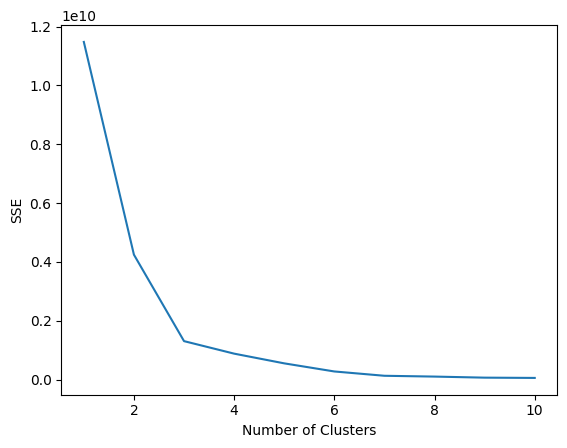

In [4]:
SSE = []
for k in range(1,11):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(cleanedData)
    SSE.append(k_means.inertia_)

plt.plot(range(1,11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

The optimal value of k is at 3 since the knee in the graph occurs at that point. However, Cal Tech might be more accurately called an outlier as it is the only school classified with cluster 3.

In [ ]:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(cleanedData)
labels = k_means.labels_
pd.DataFrame(labels, index=collegeData.School, columns=['Cluster ID'])

,Cluster ID
School,
Amherst,1
Barnard,1
Bates,1
Berkeley,1
Bowdoin,1
Brown,1
Bryn Mawr,1
Cal Tech,2
Carleton,1


In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,Median SAT,Acceptance Rate,Expenditures/Student,Top 10% HS,Graduation %
0,1301.250000,32.416667,45966.083333,81.333333,85.166667
1,1246.583333,40.194444,22752.805556,71.166667,82.833333
2,1400.000000,31.000000,102262.000000,98.000000,75.000000


2. Using college-and-university.csv, conduct Hierarchical clustering analysis based on Median SAT, Acceptance Rate, Expenditures/Student, Top 10% HS, and Graduation %. Do not use Type and School in your analysis. **Show at least two hierarchical algorithms. Compare and contrast the results.**

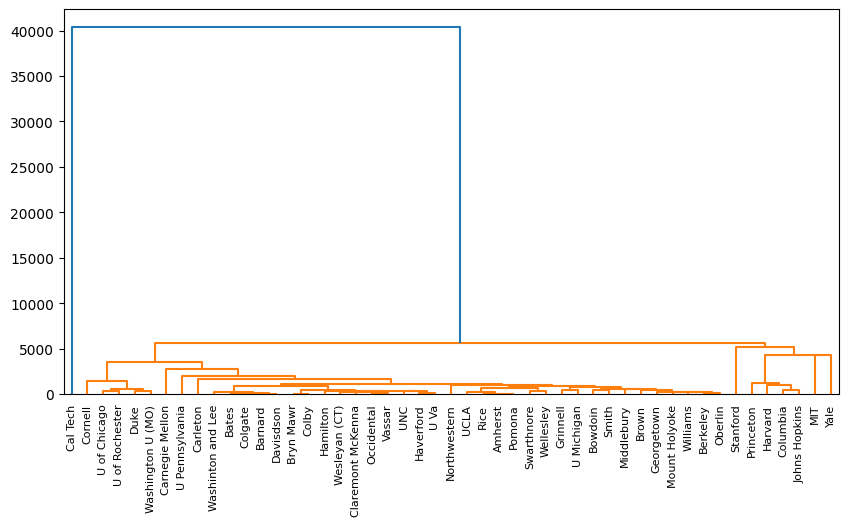

In [ ]:
collegeData = pd.read_csv('http://pluto.hood.edu/~dong/datasets/colleges-and-universities.csv',header='infer')
names = collegeData['School']
Y = collegeData['Type']
X = collegeData.drop(['Type','School'],axis=1)
X = X.map(lambda x: str(x).replace("%", "") if isinstance(x, str) else x)
Z = hierarchy.linkage(X, 'single')
#dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

plt.figure(figsize=(10, 5))  # Adjust the width and height
dn = hierarchy.dendrogram(Z,labels=names.tolist(),  leaf_font_size=8)
plt.xticks(rotation=90)
plt.show()

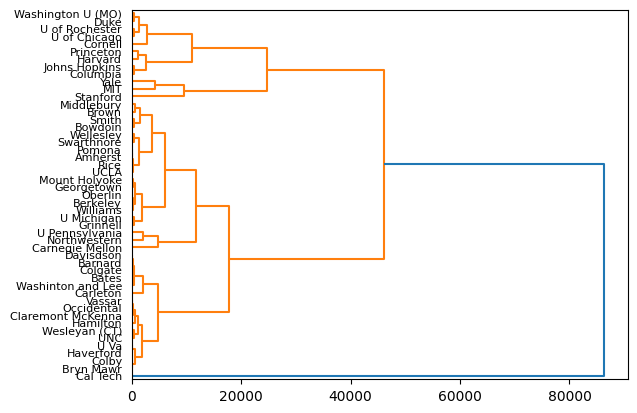

In [ ]:
Z = hierarchy.linkage(X, 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

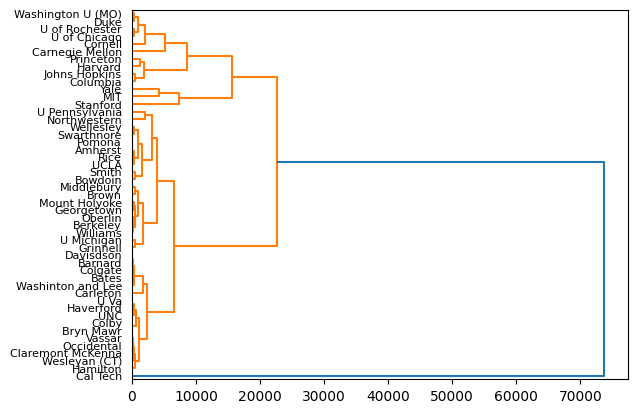

In [ ]:
Z = hierarchy.linkage(X, 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

All three algorithms recogize the same general pattern that K-means identified. There are three main clusters, two densely populated with schools, and Cal Tech was a clear outlier.

3. Using the data in df below, conduct K-means and density-based clustering. Provide visualizations of the clustering results. Use eps=30 and min_samples=6 for DBScan. **You are encouraged to experiment with eps and min_samples to optimize the results.**

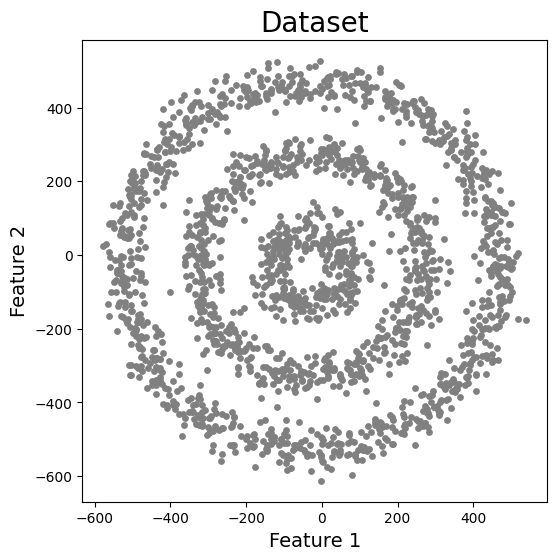

In [ ]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df1 = pd.DataFrame(PointsInCircum(500,1000))
df2 = pd.DataFrame(PointsInCircum(300,700))
df3 = pd.DataFrame(PointsInCircum(100,300))

# Adding noise to the dataset
df4 = pd.DataFrame([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

#df = pd.concat([df1, df2, df3, df4], axis= 0)
df = pd.concat([df1, df2, df3], axis= 0).reset_index(drop=True)


plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

Text(0, 0.5, 'SSE')

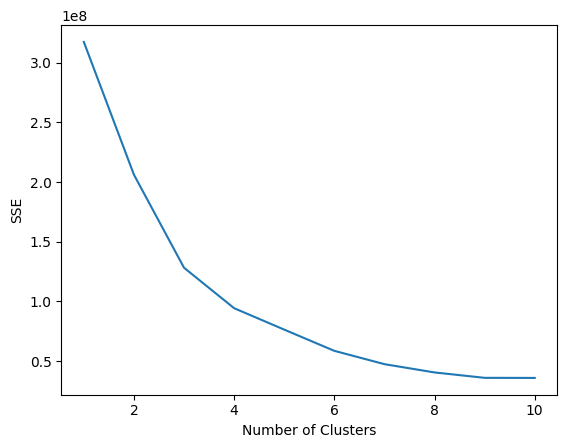

In [ ]:
SSE = []
for k in range(1,11):
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df)
    SSE.append(k_means.inertia_)

plt.plot(range(1,11), SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

In [ ]:
k_means = cluster.KMeans(n_clusters=3, max_iter=50, random_state=1)
k_means.fit(df)
labels = k_means.labels_
pd.DataFrame(labels, columns=['Cluster ID'])

,Cluster ID
0,2
1,2
2,2
3,2
4,2
...,...
1995,0
1996,2
1997,2
1998,2


Text(0.5, 1.0, 'K-means Clustering')

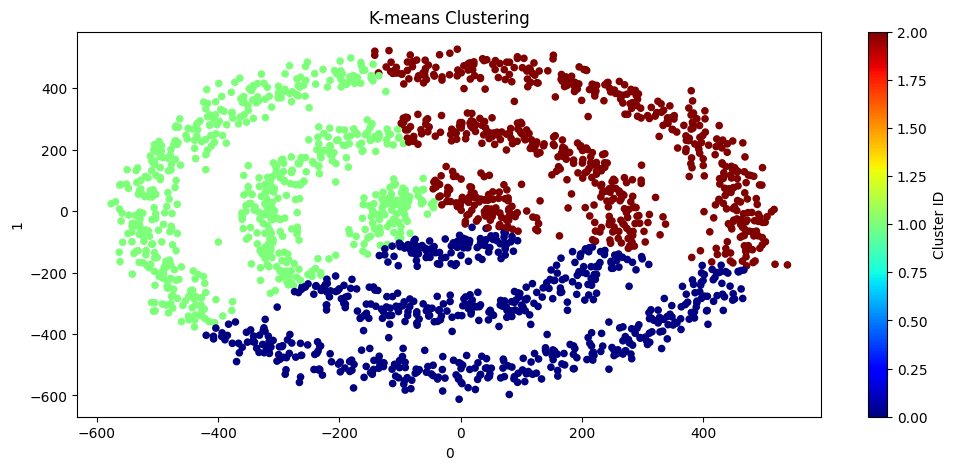

In [ ]:
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((df,labels1), axis=1)
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
result1.plot.scatter(x=0,y=1,c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')

(2000, 2)


<Axes: xlabel='0', ylabel='1'>

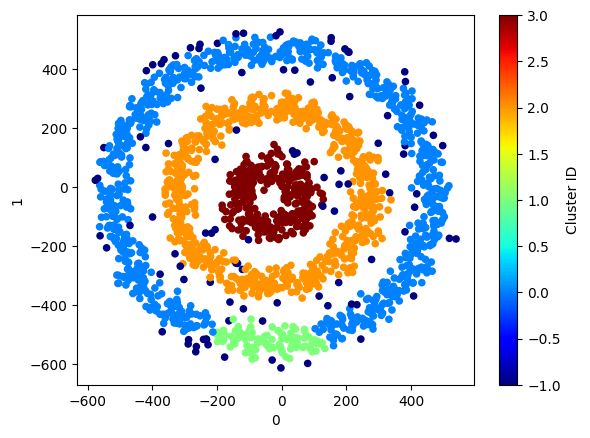

In [ ]:
print(df.shape)
db = DBSCAN(eps=30, min_samples=6).fit(df)
#core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#core_samples_mask[db.core_sample_indices_] = True
#print(len(core_samples_mask[core_samples_mask == True]))

labels2 = pd.DataFrame(db.labels_, columns=['Cluster ID']).reset_index(drop=True)
result = pd.concat((df,labels2), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

4. Using the data in the DataFrame df above, conduct spectral clustering and provide a visualization of the clustering results. Be sure to scale your data first.

Text(0.5, 1.0, 'Spectral Clustering')

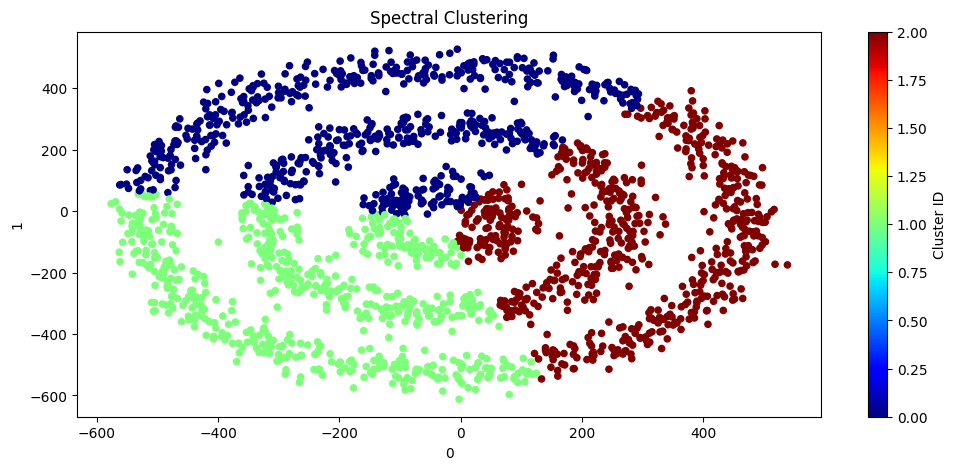

In [ ]:
from sklearn import cluster
import pandas as pd
spectral = cluster.SpectralClustering(n_clusters=3,random_state=1,affinity='nearest_neighbors',n_neighbors = 500) #changed this as rbf would only recognize one cluster
spectral.fit(df)
labels3 = pd.DataFrame(spectral.labels_,columns=['Cluster ID'])
result1 = pd.concat((df,labels3), axis=1)
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(12,5))
result1.plot.scatter(x=0,y=1,c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('Spectral Clustering')

5. Given the results from questions 3 and 4, evaluate the performance of K-means, DBSCAN, and spectral clustering **quantitatively**.

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

labels1 = labels1.values.ravel() #preventing warnings
labels2 = labels2.values.ravel()
labels3 = labels3.values.ravel()

print("SILHOUETTE SCORE")
print("K-means score:")
result1 = metrics.silhouette_score(df, labels1, metric='euclidean')
print(result1)
print("DBSCAN score:")
result2 = metrics.silhouette_score(df, labels2, metric='euclidean')
print(result2)
print("Spectral clustering score:")
result3 = metrics.silhouette_score(df, labels3, metric='euclidean')
print(result3)


print("CALUNSKI-HARABASZ SCORE")
print("K-means score:")
result1 = metrics.calinski_harabasz_score(df, labels1)
print(result1)
print("DBSCAN score:")
result2 = metrics.calinski_harabasz_score(df, labels2)
print(result2)
print("Spectral clustering score:")
result3 = metrics.calinski_harabasz_score(df, labels3)
print(result3)



SILHOUETTE SCORE
K-means score:
0.35670157770381783
DBSCAN score:
-0.0811112646737286
Spectral clustering score:
0.36280788063795977
CALUNSKI-HARABASZ SCORE
K-means score:
1438.7886472270384
DBSCAN score:
46.75494695047184
Spectral clustering score:
1465.4048280211985


Across my models, DBSCAN performs the worst compared to K-means and spectral clustering, which perform relatively the same according to silhouette and calinkski-harabasz scores. These scores indicate that there is some overlap occuring with DBSCAN as the silhouette score is near zero and the calinski-harabasz score is low. Conversely, k-means and spectral clustering scores indicate some degree of distinction between the clusters. Experimentation with the parameters of the DBSCAN only resulted in worse scores. [1]

### References
[1] Scikit-Learn User Guide, "Clustering performance evaluation," Version 1.5. [Online]. Available: https://scikit-learn.org/1.5/modules/clustering.html#clustering-performance-evaluation. [Accessed: Nov. 11, 2024]. (Used to find evaluation scores)

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!pip install nbconvert
!cp "./drive/My Drive/Colab Notebooks/Frizzell_module8.ipynb" ./
!jupyter nbconvert --to PDF "Frizzell_module8.ipynb"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
texlive is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
[NbConvertApp] Converting notebook Frizzell_module8.ipynb to PDF
[NbConvertApp] Support files will be in Frizzell_module8_files/
[NbConvertApp] Making directory ./Frizzell_module8_files
[NbConvertApp] Writing 94553 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1266055 bytes to Frizzell_module8.pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
